In [89]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
# import timestamp
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce



In [62]:

class Data():
    def __init__(self, path = None):
        
        self.directory = (glob.glob("/Data*merged.csv")) 
        # Add All the functionality to the class for organisation
        self.dailyNames = (glob.glob("daily*merged.csv")) 


        self.init()
        self.pdfs = []
        self.dailies = {}
    def init(self):
        for idx, dataName in enumerate(self.directory):
            self.pdfs.append(self.getDF(-1,dataName))

        for idx, data in enumerate(self.dailyNames):
            self.dailies[data]  =self.getDF(data)


    def getDF(self, i, byname =0):
        if(byname != 0):
            return(pd.read_csv(byname))
        return(pd.read_csv(self.directory[i]))





def containTimeInstant():
    timeList = ["time, "]

def read_file(path, expend_print = False, convertTimeDate = False):
    """ 
    read files
    """
    # formatting to pandas
    pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

    print(path)
    
    # read csv
    df  = pd.read_csv(path)
    if(expend_print):
        print(path)
        print(f"Size: {df.shape}")
        print(df.head(10))
        print(df.columns)
        print((df.Id.unique()))
        print((list(df.columns)))
    df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

    if(convertTimeDate):
        pass

    ID = "Id"
    if ID in list(df.columns):
        # df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
        return df
    return None


def saved_file(df, name ):
    df.to_csv(f'{name}.csv')

def merge_data_to_one(files, safefile = False, saveFileName = "OutputMerged"):
    outputMerged = pd.DataFrame()
    
    for idx, fileName in enumerate(set(files)):
        data = read_file(fileName)
        if isinstance(data, pd.DataFrame):
            print(fileName)
            if(idx<1):
                outputMerged = data
            else:
                pd.merge(outputMerged, data, on = 'Id', how="left")
    
    if safefile: saved_file(outputMerged, saveFileName)


def compareSimilarity(A, B):
    A.sort()
    B.sort()

    max_val = max([len(A),len(B)])

    if max_val == len(A):arrMax, secondMax =A, B 
    else: arrMax, secondMax =A, B = A, B 
    
    sumCountSimilarities = 0

    sum_=0
    for i in list(arrMax):
        for j in list(secondMax):
            if i==j:
                if i<j : break
                sumCountSimilarities+=1
                break
             
    return (sumCountSimilarities, sumCountSimilarities/max_val)


def compareamountof(lists):
    l = len(lists)
    output = []

    for i in range(l):
        for j in range(i, l):
            A = read_file(lists[i])
            B = read_file(lists[j])


            similarities, ratiosim = compareSimilarity(A.Id.unique(), B.Id.unique())
            output.append([lists[i], lists[j],similarities, ratiosim])

    return output


def divideInsertTime(data, colName):
    # time_col_split = data.colName.str.split(" ")
    # split_amount = len(list(time_col_split[0]))

    date = pd.to_datetime(data[colName])
    try:
        Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
        Heart_By_Idx['PersonID'] = data.Id.map(Id_To_Idx)

        data["Hour"] = date.dt.hour
        data["Day"]  = date.dt.day 
        data["Minute"] = date.dt.minute
        data["DateOfWeek"] = date.dt.day_name()      
        print("Date Changed")
    except:
        e = sys.exc_info()
        print(f"Could Not Prase Data: Check Col Name; Erorr: {sys.exc_info()}")        

    return data




def pvalue_test(data, col_name, based_on_col_vals):
    i = 0
    print(f"Based on column: {col_name}")
    for (columnName, columnData) in data.iteritems():
        if i>1:
            stat, p = kendalltau(columnData, based_on_col_vals)
            print('Column Name : ', columnName)
            print(p)
        i +=1
#TODO : Set Index: data.set_index("Id")

In [3]:
data_csvs = (glob.glob("../Data/*merged.csv")) 
data_csvs


['../Data\\dailyActivity_merged.csv',
 '../Data\\dailyCalories_merged.csv',
 '../Data\\dailyIntensities_merged.csv',
 '../Data\\dailySteps_merged.csv',
 '../Data\\heartrate_seconds_merged.csv',
 '../Data\\hourlyCalories_merged.csv',
 '../Data\\hourlyIntensities_merged.csv',
 '../Data\\hourlySteps_merged.csv',
 '../Data\\minuteCaloriesNarrow_merged.csv',
 '../Data\\minuteCaloriesWide_merged.csv',
 '../Data\\minuteIntensitiesNarrow_merged.csv',
 '../Data\\minuteIntensitiesWide_merged.csv',
 '../Data\\minuteMETsNarrow_merged.csv',
 '../Data\\minuteSleep_merged.csv',
 '../Data\\minuteStepsNarrow_merged.csv',
 '../Data\\minuteStepsWide_merged.csv',
 '../Data\\sleepDay_merged.csv',
 '../Data\\weightLogInfo_merged.csv']

In [4]:
dailyData = (glob.glob("../Data/daily*merged.csv"))  +  (glob.glob("../Data/heartrate*merged.csv")) 


In [22]:
print(compareamountof(dailyData))

../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyActivity_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyCalories_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyIntensities_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_secon

In [5]:
steps = read_file(data_csvs[3])
steps.ActivityDay = pd.to_datetime(steps["ActivityDay"])
steps.rename(columns={"ActivityDay": "Day"}, inplace=True)
steps



../Data\dailySteps_merged.csv


,Id,Day,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


In [6]:
calories = read_file(data_csvs[1])
calories.ActivityDay = pd.to_datetime(calories['ActivityDay'])
calories.rename(columns={"ActivityDay": "Day"}, inplace = True)
calories

../Data\dailyCalories_merged.csv


,Id,Day,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


## Calories Exploration


In [13]:
sleep = read_file(data_csvs[-2])
sleep.SleepDay = pd.to_datetime(sleep['SleepDay'])
sleep.rename(columns={"SleepDay": "Day"}, inplace=True)
sleep.head()

../Data\sleepDay_merged.csv


,Id,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [8]:
meged_cl_sle =calories.merge(sleep, left_on=["Id","Day" ], right_on=["Id", "Day"])
meged_cl_sle.drop(columns=["Id"], inplace= False).corr().round(2)


,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Calories,1.00,-0.05,-0.03,-0.13
TotalSleepRecords,-0.05,1.00,0.17,0.17
TotalMinutesAsleep,-0.03,0.17,1.00,0.93
TotalTimeInBed,-0.13,0.17,0.93,1.00


Text(0.5, 1.0, 'Corr')

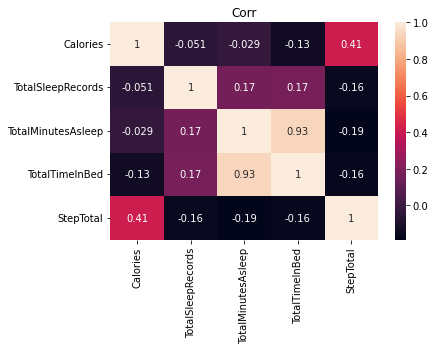

In [9]:
meged_cl_sle_steps =meged_cl_sle.merge(steps, left_on=["Id","Day" ], right_on=["Id", "Day"])
corr= meged_cl_sle_steps.drop(columns=["Id"], inplace= False).corr()


plot =sns.heatmap(corr, annot = True)
plot.set_title("Corr")

In [38]:
meged_cl_sle_steps.head()

,Id,Day,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,StepTotal
0,1503960366,2016-04-12,1985,1,327,346,13162
1,1503960366,2016-04-13,1797,2,384,407,10735
2,1503960366,2016-04-15,1745,1,412,442,9762
3,1503960366,2016-04-16,1863,2,340,367,12669
4,1503960366,2016-04-17,1728,1,700,712,9705


In [44]:
dd = list(meged_cl_sle_steps.columns)
for i in dd:
    print(i)

Id
Day
Calories
TotalSleepRecords
TotalMinutesAsleep
TotalTimeInBed
StepTotal


In [179]:
meged_cl_sle_steps.dtypes

Id                             int64
Day                   datetime64[ns]
Calories                       int64
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
StepTotal                      int64
dtype: object

In [55]:
from scipy.stats import kendalltau 
columns = list(meged_cl_sle_steps.columns)
for idx in range(1, len(list(meged_cl_sle_steps.columns))):
        stat, p = kendalltau(meged_cl_sle_steps.columns[idx], meged_cl_sle_steps.TotalSleepRecords)
        print(p)  


<class 'str'>


ValueError: All inputs to `kendalltau` must be of the same size, found x-size 1 and y-size 413

## Feedback
Two important issues, The total amount of records has only a weak potivie correlation with Total time in bed. Which is a little surprising. Yet total sleep  has a stronger negative correlation (yet still weak) with the duration which spent in bed yet smaller on the record of sleep

## Heart Rate Exploration

In [69]:
doClean = False

heart_rate = read_file(dailyData[4])
heart_rate.Time = pd.to_datetime(heart_rate.Time)

if doClean:
    HeartRateFiltered = divideInsertTime(heart_rate, "Time")

heart_rate["Date"] = heart_rate.Time.dt.date
heart_rate["Time"]  = heart_rate["Time"].dt.time


heart_rate_std = heart_rate.groupby(["Date", "Id"]).std()
heart_rate_mean = heart_rate.groupby(["Date", "Id"]).mean()
heart_rate_median = heart_rate.groupby(["Date", "Id"]).median()

../Data\heartrate_seconds_merged.csv


In [93]:

# compile the list of dataframes you want to merge
data_frames = [heart_rate_std, heart_rate_mean, heart_rate_median]
nan_value = 0

result_1 = pd.concat(data_frames, join='outer', axis=1).fillna(nan_value)

result_2 = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_=True, right_index=True, 
                                              how='outer'), 
                  data_frames).fillna(nan_value)

In [172]:
arr_idx = np.array([(list(values)[0],  list(values)[1]) for values in (result_2.index)])

result_2["Date"] = arr_idx[:,0]
result_2["Id"] = arr_idx[:,1]
Dropeed_Indx_HeartRate = result_2.reset_index(drop=True)


In [200]:

data_frames2 = [Dropeed_Indx_HeartRate, meged_cl_sle_steps]
result_3 = pd.concat(data_frames2, join='outer', axis=0).fillna(nan_value)

result_4 = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='outer'), 
                  data_frames).fillna(nan_value)

# left_index=True, right_index=True

In [211]:
Dropeed_Indx_HeartRate.Date.astype('str')

meged_cl_sle_steps["DateSTR"]  =  meged_cl_sle_steps["Day"].astype('str')

In [214]:
Dropeed_Indx_HeartRate["TimeSTR"] = Dropeed_Indx_HeartRate.Date.astype('str')

In [142]:
Dropeed_Indx_HeartRate.merge(meged_cl_sle_steps, left_on=["Id", "Date"], right_on=["Id", "Day"], how = 'inner')

2

In [217]:
totalMerge = meged_cl_sle_steps.merge(Dropeed_Indx_HeartRate, left_on=["Id","DateSTR" ], right_on=["Id", "TimeSTR"]).drop(columns=["Date", "TimeSTR", "DateSTR"])

Text(0.5, 1.0, 'Corr')

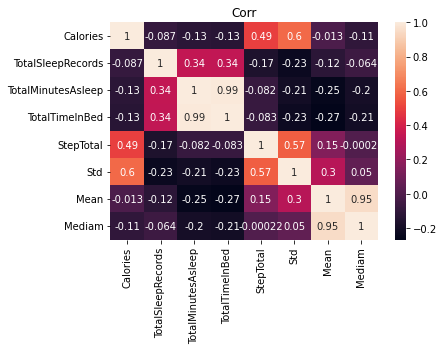

In [220]:
TotalCorr = totalMerge.corr()

plot =sns.heatmap(TotalCorr, annot = True)
plot.set_title("Corr")

In [269]:
totalMerge

,Id,Day,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,StepTotal,Std,Mean,Mediam
0,2026352035,2016-04-17,1214,1,437,498,838,3.486183,68.656250,68.0
1,2026352035,2016-04-25,1576,1,506,531,6017,7.662667,99.505814,98.0
2,2026352035,2016-05-02,1690,1,511,543,7018,9.091549,84.134571,81.0
3,2026352035,2016-05-09,1869,1,531,556,10685,9.533803,98.233901,98.0
4,2347167796,2016-04-13,2038,1,467,531,10352,13.014521,73.812905,71.0
...,...,...,...,...,...,...,...,...,...,...
177,8792009665,2016-04-30,2896,1,343,360,7174,14.072832,81.464642,81.0
178,8792009665,2016-05-01,1962,1,503,527,1619,9.892940,67.810171,66.0
179,8792009665,2016-05-02,2015,1,415,423,1831,10.397178,67.403919,65.0
180,8792009665,2016-05-03,2297,1,516,545,2421,12.616910,74.371940,74.0


In [96]:
result_2.rename(columns = {"Value_x": "Std","Value_y": "Mean", "Value": "Mediam"}, inplace = True)

In [ ]:
merged_Heart_rate = pd.merge([heart_rate_std,heart_rate_mean])

In [313]:
Heart_By_Idx = HeartRateFiltered #.set_index("Id")
Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
Idx_to_Id = {num :id for num,id in enumerate(Heart_By_Idx.Id.unique())}
Heart_By_Idx['PersonID'] = Heart_By_Idx.Id.map(Id_To_Idx)

Heart_By_Idx.Time = pd.to_datetime(Heart_By_Idx.Time)

## Heart Rate Exploration 1
 


In [314]:
Idx_to_Id

{0: 2022484408,
 1: 2026352035,
 2: 2347167796,
 3: 4020332650,
 4: 4388161847,
 5: 4558609924,
 6: 5553957443,
 7: 5577150313,
 8: 6117666160,
 9: 6775888955,
 10: 6962181067,
 11: 7007744171,
 12: 8792009665,
 13: 8877689391}

In [258]:
Heart_By_Idx["Date"] = Heart_By_Idx.Time.dt.date
Heart_By_Idx['dif'] = Heart_By_Idx.groupby(['Id', 'Date'])['Value'].diff().fillna(0).astype(int)


In [280]:
Heart_By_Idx

,Id,Time,Value,PersonID,Date,dif
0,2022484408,2016-04-12 07:21:00,97,0,2016-04-12,0
1,2022484408,2016-04-12 07:21:05,102,0,2016-04-12,5
2,2022484408,2016-04-12 07:21:10,105,0,2016-04-12,3
3,2022484408,2016-04-12 07:21:20,103,0,2016-04-12,-2
4,2022484408,2016-04-12 07:21:25,101,0,2016-04-12,-2
...,...,...,...,...,...,...
2483653,8877689391,2016-05-12 14:43:53,57,13,2016-05-12,-1
2483654,8877689391,2016-05-12 14:43:58,56,13,2016-05-12,-1
2483655,8877689391,2016-05-12 14:44:03,55,13,2016-05-12,-1
2483656,8877689391,2016-05-12 14:44:18,55,13,2016-05-12,0


In [283]:
Heart_By_Idx.groupby(['Id', 'Date'])

In [285]:
Heart_By_Idx[(Heart_By_Idx.PersonID ==1)].groupby(['Date', 'Id'])

In [316]:
dif_Df_HeartRate

,Id,Date,std,max,min,numOrChanges
0,2022484408,2016-04-12,2.043933,20,-24,25


In [338]:
dif_Df_HeartRate = pd.DataFrame(columns = ["Id", "Date","std", "max", "min", "numOfDrasticPositiveChanges", "numOfDrasticNegativeChanges" ])
index = 0
for i in range(len(Heart_By_Idx.PersonID.unique())):
    data_= Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i]

    for day_num, day in enumerate(data_.Date.unique()):
        # print(data_[data_.Date ==day])
        data_[data_.Date ==day]['dif']
        # print(data_)

        maxChange =data_[data_.Date ==day]['dif'].max()
        stdChange =data_[data_.Date ==day]['dif'].std()
        MedianChange =data_[data_.Date ==day]['dif'].median()
        MinChange =data_[data_.Date ==day]['dif'].min()
        # print(stdChange)
        arr = np.array(data_[data_.Date ==day]['dif'])
        # num_of_P_drastic_changes = np.sum(np.where((np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange))and ((np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange))),1,0))
        # num_of_N_drastic_changes = np.sum(np.where(np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange),1,0))
        num_of_P_drastic_changes = np.sum(np.where((np.abs(arr)> 2.5*float(stdChange)) & ((arr)> 0),1,0))

        num_of_N_drastic_changes = np.sum(np.where((np.abs(arr)> 2.5*float(stdChange)) & ((arr)< 0),1,0))

        # print(num_of_drastic_changes)
        dif_Df_HeartRate.loc[index]= [Idx_to_Id[i], day, stdChange, maxChange, MinChange, num_of_P_drastic_changes, num_of_N_drastic_changes]
        index+=1



Text(0.5, 1.0, 'Radical Heart Rate Changes to Sleep Quality Corr')

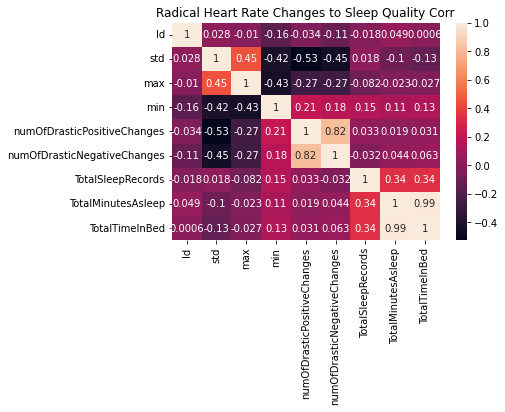

In [339]:
dif_Df_HeartRate.Date = dif_Df_HeartRate.Date.astype('str')
sleep.Day = sleep.Day.astype('str')

sleep_heartRate = dif_Df_HeartRate.merge(sleep,left_on=["Id","Date" ],  right_on= ["Id","Day" ]).drop(columns = ['Day'])
corr_sleepHearRate = sleep_heartRate.corr()


plot =sns.heatmap(corr_sleepHearRate, annot = True)
plot.set_title("Radical Heart Rate Changes to Sleep Quality Corr")

 std: 0.012404660099056417
max: 0.6545454545454545
min: -0.3151515151515152
amount of drastic changes: 31


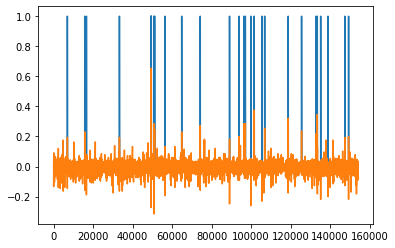

 std: 0.03425202333779087
max: 0.5806451612903225
min: -0.37096774193548376
amount of drastic changes: 1


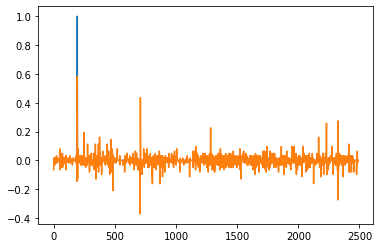

 std: 0.015717302156060965
max: 0.6095890410958905
min: -0.363013698630137
amount of drastic changes: 28


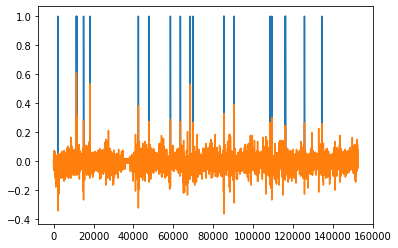

 std: 0.007616525667478592
max: 0.37241379310344835
min: -0.6827586206896552
amount of drastic changes: 130


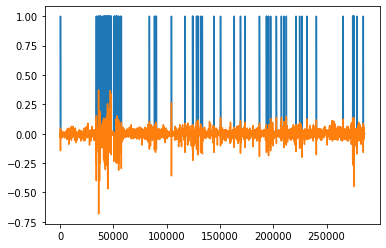

 std: 0.017295734394618005
max: 0.375886524822695
min: -0.35460992907801414
amount of drastic changes: 17


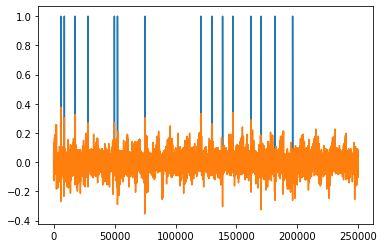

 std: 0.01570269668135725
max: 0.45806451612903226
min: -0.4258064516129032
amount of drastic changes: 37


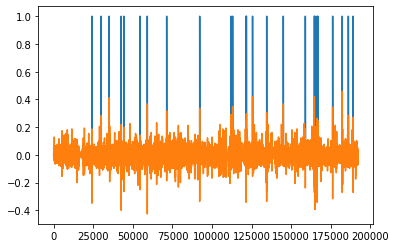

 std: 0.013330519505707884
max: 0.6610169491525423
min: -0.3220338983050848
amount of drastic changes: 21


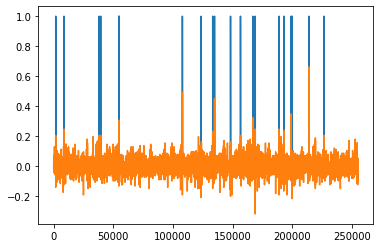

 std: 0.015005594032544799
max: 0.572463768115942
min: -0.6956521739130436
amount of drastic changes: 119


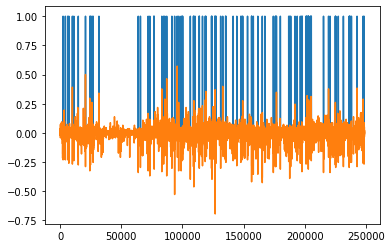

 std: 0.01785328784836719
max: 0.7226277372262774
min: -0.39416058394160586
amount of drastic changes: 15


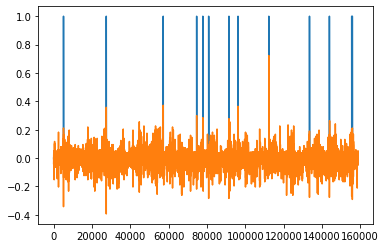

 std: 0.02227297419360664
max: 0.5737704918032787
min: -0.8770491803278688
amount of drastic changes: 16


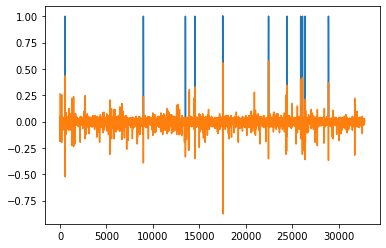

 std: 0.014078201477394867
max: 0.6496350364963505
min: -0.6058394160583942
amount of drastic changes: 37


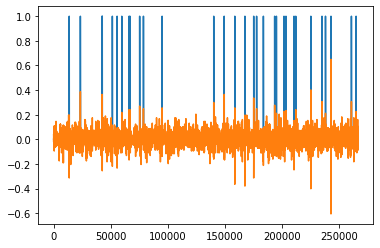

 std: 0.018659165676890143
max: 0.39285714285714285
min: -0.4374999999999999
amount of drastic changes: 24


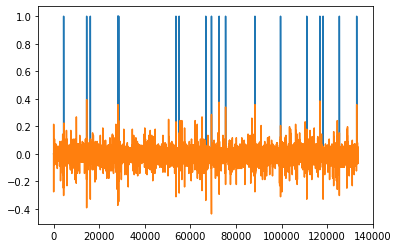

 std: 0.020446257655366132
max: 0.5304347826086957
min: -0.4956521739130435
amount of drastic changes: 30


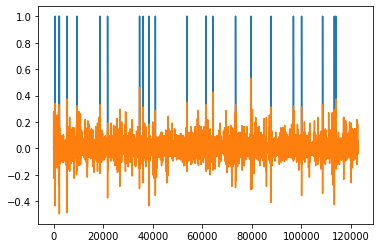

In [222]:
Heart_By_Idx2 = Heart_By_Idx.copy()

for i in range(13):
    data_= np.array(Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i].Value)

    for day_num, day in enumerate(data_.Date.unique()):
        data_ = data_/ (data_.max()- data_.min())
        diff_ = np.array([data_[curr] - data_[curr-1] for curr in range(1,len(data_))])
        print(f" std: {diff_.std()}")
        print(f"max: {diff_.max()}")
        print(f"min: {diff_.min()}")

        amount_of_unusual_changes = np.where(np.abs(diff_) >=15* np.abs(diff_.std()),1,0)
        print(f"amount of drastic changes: {amount_of_unusual_changes.sum()}")

        plt.plot(amount_of_unusual_changes)
        plt.plot(diff_)	#plot the points

        plt.show()
        # input()

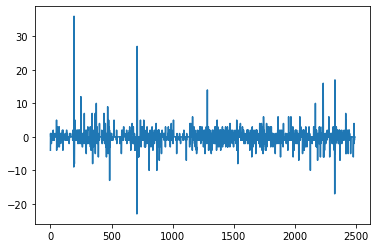

In [166]:
sleepRate = read_file(data_csvs[-2])
sleepRate

sleepDay_merged.csv


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [22]:
pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

df= read_file(data_csvs[4])
df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

df['Time'] = pd.to_datetime(df['Time']).dt.date

heartrate_seconds_merged.csv
['Id', 'Time', 'Value']


In [155]:
Sleepingdata= read_file(data_csvs[-2])
sleep_ID= Sleepingdata.Id.unique()


sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


In [148]:
print(sleep_ID== unique_ID)

False


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\4166130050.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(sleep_ID== unique_ID)


In [156]:
data2= read_file(data_csvs[4])
print(f"Number of measured Heart Beat Perople:")
print( {len(data2.groupby("Id").count())})
unique_ID= data2.Id.unique()


heartrate_seconds_merged.csv
['Id', 'Time', 'Value']
Number of measured Heart Beat Perople:
{14}


In [162]:
print((list(unique_ID))

None


In [165]:
sum_

12

In [118]:
p2_2.describe()


p2_2.drop(columns={'LightlyActiveMinutes', 'FairlyActiveMinutes','SedentaryActiveDistance','ModeratelyActiveDistance'}, inplace= True, errors=True)

p2_2

KeyError: "['LightlyActiveMinutes', 'FairlyActiveMinutes', 'ModeratelyActiveDistance', 'SedentaryActiveDistance'] not found in axis"

In [111]:
data2= read_file(data_csvs[2])
p2_2= data2[data2.Id ==1503960366]

datasleep= read_file(data_csvs[-2])
p1 = datasleep[datasleep.Id ==1503960366]
p1.rename(columns={'SleepDay': 'Date'},
          inplace=True, errors='raise')
p2_2.rename(columns={'ActivityDay': 'Date'},
          inplace=True, errors='raise')

p1.Date = p1.Date.str.slice(0, -11,1)

# d = p1.SleepDay.apply(lambda x: dt.datetime.strptime(x,infer_datetime_format=True))
# p1['SleepDay'] = pd.to_datetime(p1['SleepDay']) 

pd.merge(p2_2, p1)
# Intensives= data2.groupby("Id").sum()[['TotalSteps','Calories' ]]

dailyIntensities_merged.csv
['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']
sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.rename(columns={'SleepDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_2.rename(columns={'ActivityDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [109]:

p2_2

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71
5,1503960366,4/17/2016,539,164,20,38,0.0,2.51,0.78,3.19
6,1503960366,4/18/2016,1149,233,16,42,0.0,4.71,0.64,3.25
7,1503960366,4/19/2016,775,264,31,50,0.0,5.03,1.32,3.53
8,1503960366,4/20/2016,818,205,12,28,0.0,4.24,0.48,1.96
9,1503960366,4/21/2016,838,211,8,19,0.0,4.65,0.35,1.34


In [ ]:
data2= read_file(data_csvs[2])
data2[data2.Id ==1503960366].ActivityDay


In [33]:
data0= read_file(data_csvs[4])
steps_Calories= data0.groupby("Id").sum()[['TotalSteps','Calories' ]]

,TotalSteps,Calories
Id,,
1503960366,375619,56309
1624580081,178061,45984
1644430081,218489,84339
1844505072,79982,48778
1927972279,28400,67357
2022484408,352490,77809
2026352035,172573,47760
2320127002,146223,53449
2347167796,171354,36782
